## 훈련 세트와 테스트 세트

#### 생선 분류
- 앞의 예제에서 훈련데이터에서 도미를 100% 완벽하게 분류함
    - 문제점 : 정답을 미리 알려주고 시험보는 것과 같음
- 훈련한 데이터와 평가에서 사용될 데이터가 달라야 함

#### Data split과 모델 검증
- When
    - "충분히 큰" 데이터 세트를 가용할 때
    - "충분히 큰" 데이터 세트가 없을 때는 교차 검증 고려

- Why
    - 학습에 사용되지 않은 데이터를 사용하여 예측을 수행함으로써 모델의 일반적인 성능에 대한 적절한 예측을 함

- How
    - 홀드-아웃 (Hold-out)
    - 교차검증 (Cross validation, CV)


### 홀드-아웃 방식
- 데이터를 두 개 세트로 나누어 각각 Train과 Test 세트로 사용
- Train과 Test의 비율을 7:3 ~ 9:1로 널리 사용하나, 알고리즘의 특성 및 상황에 따라 적절한 비율을 사용
- Train – Validation - Test로 나누기도 함


https://algotrading101.com/learn/train-test-split-2/


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns

In [7]:
#그래프 패키지 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [8]:
# 동시 출력
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [9]:
# 한글 문제 해결
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')# 한글 문제 해결
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [3]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7,
               31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5,
               34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0,
               38.5, 38.5, 39.5, 41.0, 41.0, 
               9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2,
               12.4, 13.0, 14.3, 15.0]

fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0,
               475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0,
               575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0,
               920.0, 955.0, 925.0, 975.0, 950.0, 
               6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [4]:
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

In [5]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

#### 훈련 데이터셋과 테스트 데이터셋으로 분리

In [10]:
# 훈련(train) 데이터
train_input = fish_data[:35]
train_target = fish_target[:35]


# 평가(test) 데이터
test_input = fish_data[35:]
test_target = fish_target[35:]

#### 학습 및 평가

In [11]:
kn.fit(train_input, train_target)
kn.score(test_input, test_target) # 정확도가 0 출력
# 정확도가 0인 모델

KNeighborsClassifier()

0.0

In [14]:
# 학습 label 확인
print(train_target) # 학습을 도미 데이터
print(test_target) # 평가는 빙어 데이터로 평가

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### why? 성능이 o인가?

** 편향(biased) 된 데이터 셋 구성 때문에
- 샘플링 편향 (Sampling Bias)

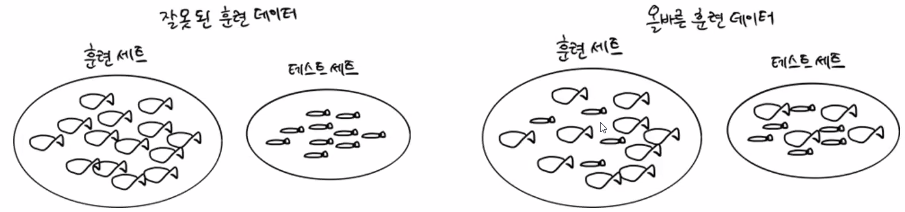

## 올바른 훈련 데이터와 테스트 데이터 구성

In [17]:
import numpy as np

In [16]:
## array 형태로 사용
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [20]:
input_arr.shape

(49, 2)

## 데이터 섞기 (shuffling)

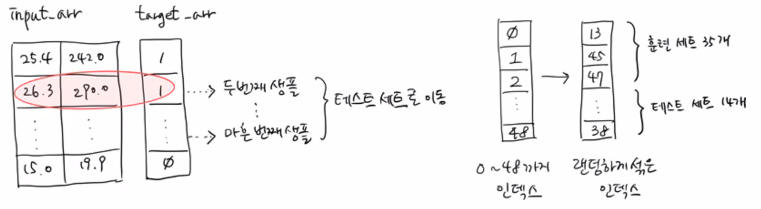

In [24]:
np.random.seed(42) # 매 실행마다 동일한 난수가 발생할 수 있도록 seed 값 설정

index = np.arange(49)
print('suffle 전 : ', index)


np.random.shuffle(index)
print('suffle 후 : ', index)

suffle 전 :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]
suffle 후 :  [13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [28]:
## 학습용
index[:35]


## 테스트용
index[35:]

array([13, 45, 47, 44, 17, 27, 26, 25, 31, 19, 12,  4, 34,  8,  3,  6, 40,
       41, 46, 15,  9, 16, 24, 33, 30,  0, 43, 32,  5, 29, 11, 36,  1, 21,
        2])

array([37, 35, 23, 39, 10, 22, 18, 48, 20,  7, 42, 14, 28, 38])

#### 데이터 분할

In [32]:
## 학습용 데이터
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

In [33]:
print(train_input)
print(train_target)

[[  32.   340. ]
 [  12.4   13.4]
 [  14.3   19.7]
 [  12.2   12.2]
 [  33.   700. ]
 [  36.   714. ]
 [  35.   720. ]
 [  35.   725. ]
 [  38.5  955. ]
 [  33.5  650. ]
 [  31.5  500. ]
 [  29.   430. ]
 [  41.   950. ]
 [  30.   450. ]
 [  29.   363. ]
 [  29.7  500. ]
 [  11.3    8.7]
 [  11.8   10. ]
 [  13.    12.2]
 [  32.   600. ]
 [  30.7  500. ]
 [  33.   700. ]
 [  35.   700. ]
 [  41.   975. ]
 [  38.5  920. ]
 [  25.4  242. ]
 [  12.     9.8]
 [  39.5  925. ]
 [  29.7  450. ]
 [  37.  1000. ]
 [  31.   500. ]
 [  10.5    7.5]
 [  26.3  290. ]
 [  34.   685. ]
 [  26.5  340. ]]
[1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1]


In [34]:
## 테스트용 데이터
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

In [35]:
print(test_input)
print(test_target)

[[ 10.6   7. ]
 [  9.8   6.7]
 [ 35.  680. ]
 [ 11.2   9.8]
 [ 31.  475. ]
 [ 34.5 620. ]
 [ 33.5 610. ]
 [ 15.   19.9]
 [ 34.  575. ]
 [ 30.  390. ]
 [ 11.8   9.9]
 [ 32.  600. ]
 [ 36.  850. ]
 [ 11.    9.7]]
[0 0 1 0 1 1 1 0 1 1 0 1 1 0]


Text(0.5, 0, 'length')

Text(0, 0.5, 'weight')

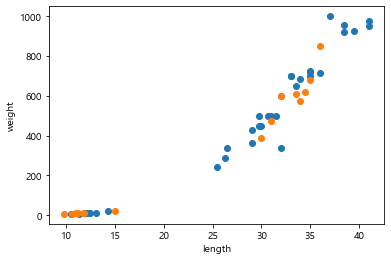

In [36]:
plt.scatter(train_input[:, 0], train_input[:, 1]) # 전체 행의 0번째 열
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


In [37]:
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [38]:
kn.score(test_input, test_target)

1.0

In [39]:
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [40]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

### 마무리
- 데이터의 편향은 잘못된(쓰레기) 모델을 만들어 낸다